<a href="https://colab.research.google.com/github/skytmddus27/president_election/blob/master/%EC%8A%A4%EB%A7%88%EC%9D%BC%EA%B2%8C%EC%9D%B4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:3 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [1,954 kB]
Get:13 http://ppa

In [ ]:
import matplotlib as mpl 
import matplotlib.pyplot as plt

mpl.rcParams['axes.unicode_minus'] = False

plt.rc('font', family = 'NanumBarunGothic')

## Korean UnSmile Dataset

In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 9.1 MB/s 
     |████████████████████████████████| 77 kB 7.1 MB/s 
     |████████████████████████████████| 880 kB 41.3 MB/s 
     |████████████████████████████████| 6.6 MB 43.3 MB/s 
     |████████████████████████████████| 596 kB 35.9 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=a61b8edbd2f9acaad79b4c695e654f58cc8af7a0373e2dc6582a9923c40df93e
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import TextClassificationPipeline, BertForSequenceClassification, AutoTokenizer
model_name = 'smilegate-ai/kor_unsmile'
model = BertForSequenceClassification.from_pretrained(model_name)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name, model_max_length = 600)

In [ ]:
# tokenizer = AutoTokenizer.from_pretrained(model_name)
pipe = TextClassificationPipeline(
        model = model,
        tokenizer = tokenizer,
        device = 0,   # cpu: -1, gpu: gpu number
        return_all_scores = True,
        function_to_apply = 'sigmoid'
    )

In [ ]:
# for result in pipe("이래서 여자는 게임을 하면 안된다")[0]:
#         print(result)

{'label': '여성/가족', 'score': 0.8253053426742554}
{'label': '남성', 'score': 0.039725106209516525}
{'label': '성소수자', 'score': 0.01214433740824461}
{'label': '인종/국적', 'score': 0.023181892931461334}
{'label': '연령', 'score': 0.010315303690731525}
{'label': '지역', 'score': 0.01845489628612995}
{'label': '종교', 'score': 0.011270021088421345}
{'label': '기타 혐오', 'score': 0.020734040066599846}
{'label': '악플/욕설', 'score': 0.057331427931785583}
{'label': 'clean', 'score': 0.14010533690452576}


## Model evaluation

In [ ]:
def get_predicted_label(output_labels, min_score):
    labels = []
    for label in output_labels:
        if label['score'] > min_score:
            labels.append(1)
        else:
            labels.append(0)
    return labels

In [ ]:
import tqdm
from transformers.pipelines.base import KeyDataset

predicted_labels = []

for out in tqdm.tqdm(pipe(KeyDataset(dataset['valid'], '문장'))):
    predicted_labels.append(get_predicted_label(out, 0.5))

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(dataset['valid']['labels'], predicted_labels))

## apply

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
park = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/park.csv')
fire = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/fire.csv')
ahn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/ahn.csv')
number = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/number.csv')

In [ ]:
def clean_tweets(text):
    text = re.sub("RT @[\w]*:", "", text)
    text = re.sub("@[\w]*", "", text)
    text = re.sub("https?://[A-Za-z0-9./]*", "", text)
    text = re.sub("\n", "", text)
    return text

### 박지현


In [ ]:
park['Text'] = park['Text'].apply(lambda x: clean_tweets(str(x)))

In [ ]:
# model

In [ ]:
result = []
for t in park['Text'].astype(str):
    result.extend(pipe(t))

In [ ]:
# # 결과 예시
# result[0]

[{'label': '여성/가족', 'score': 0.02072562277317047},
 {'label': '남성', 'score': 0.006770328152924776},
 {'label': '성소수자', 'score': 0.016212133690714836},
 {'label': '인종/국적', 'score': 0.01622561551630497},
 {'label': '연령', 'score': 0.004838174674659967},
 {'label': '지역', 'score': 0.02388833276927471},
 {'label': '종교', 'score': 0.008562009781599045},
 {'label': '기타 혐오', 'score': 0.013309120200574398},
 {'label': '악플/욕설', 'score': 0.10587102919816971},
 {'label': 'clean', 'score': 0.7603580951690674}]

In [ ]:
# dict -> list로 정리
score = [[item['score'] for item in i] for i in result]
#score # 확인용
score = np.round(score,2)

In [ ]:
label =  ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean']
new_df = pd.DataFrame(score, columns=label)
new_df['result'] = new_df.idxmax(axis = 1)
new_df

,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,result
0,0.02,0.01,0.02,0.02,0.00,0.02,0.01,0.01,0.11,0.76,clean
1,0.03,0.01,0.01,0.27,0.00,0.01,0.01,0.01,0.08,0.34,clean
2,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.13,0.84,clean
3,0.02,0.01,0.02,0.02,0.01,0.02,0.01,0.01,0.04,0.91,clean
4,0.02,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.07,0.91,clean
...,...,...,...,...,...,...,...,...,...,...,...
6756,0.42,0.01,0.01,0.02,0.01,0.01,0.01,0.04,0.25,0.26,여성/가족
6757,0.08,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.05,0.87,clean
6758,0.02,0.02,0.02,0.02,0.01,0.02,0.01,0.01,0.05,0.92,clean
6759,0.02,0.02,0.01,0.02,0.01,0.02,0.01,0.01,0.06,0.91,clean


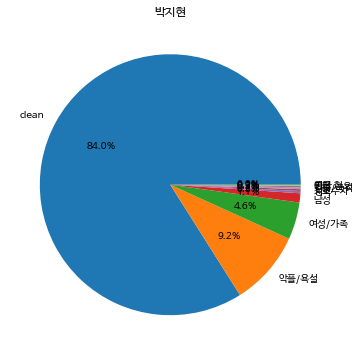

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.title('박지현')
plt.pie(new_df['result'].value_counts()/len(new_df),
        labels = ['clean', '악플/욕설', '여성/가족', '남성', '지역', '성소수자',
                  '인종/국적', '기타 혐오', '연령', '종교'],
        autopct = '%.1f%%')
plt.show()

In [ ]:
label =  ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean']
new_df = pd.DataFrame(score, columns=label)

# df에 text열 추가 - 텍스트와 같이 보고 싶을 경우
new_df.insert(0, 'text', park['Text']) # 앞에 숫자가 순서(왼쪽->오른쪽)

new_df[new_df['여성/가족'] >= 0.6]

,text,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
27,부위원장님이 계셔서 우리는 그래도 희망을 봤습니다 이제 여자들의 피맺힌 목소리를 ...,0.71,0.02,0.01,0.01,0.01,0.02,0.01,0.03,0.10,0.24
61,민주당은 앞으로 더 정신 바짝 차려야해일찍부터 이재명 팍팍 밀어주고페미니즘 공약들 ...,0.84,0.01,0.02,0.03,0.01,0.03,0.01,0.04,0.08,0.15
101,박지현님 무탈하시길 바라고…. 무섭다 여자들에게 노동자들에게 어떤일들이 벌어질까 너...,0.74,0.03,0.01,0.02,0.01,0.01,0.01,0.02,0.06,0.25
194,박지현 위원장님 저희야말로감사하고 죄송합니다+민주당 놈들아 빨리 박지현님지켜 비례대...,0.67,0.07,0.02,0.02,0.01,0.02,0.01,0.04,0.22,0.08
204,여자연옌 목 길이 꼬막눈 고관절분석하다가 코르셋정병부메랑 역으로 처맞고 아랫세대 여...,0.63,0.23,0.04,0.02,0.02,0.01,0.01,0.04,0.10,0.06
...,...,...,...,...,...,...,...,...,...,...,...
6588,"여가부 폐지를 핵심공약으로 하고 더해서 성범죄 무고죄 강화,페미는 반헌법적이라는 새...",0.70,0.01,0.01,0.03,0.01,0.01,0.01,0.05,0.23,0.09
6604,불법촬영은 사법부가 처리해요. 여가부 폐지한다고 무죄가 되지 않아요. 전세계 어디...,0.87,0.01,0.03,0.03,0.01,0.01,0.01,0.07,0.09,0.08
6615,윤석열 후보와 국민의힘은 그동안 남성과 여성을 편 가르며 젠더 갈등을 부추겨왔습니다...,0.80,0.01,0.04,0.02,0.01,0.01,0.01,0.06,0.06,0.15
6622,페미니즘이 위헌이라는 윤석열 vs 추적단불꽃님 박지현님과 함께 일하는 이재명무조건 ...,0.91,0.04,0.05,0.03,0.01,0.02,0.02,0.06,0.04,0.05


In [ ]:
park_여성가족 = new_df[new_df['여성/가족'] >= 0.6]
park_남성 = new_df[new_df['남성'] >= 0.6]
park_성소수자 = new_df[new_df['성소수자'] >= 0.6]

In [ ]:
park_여성가족.to_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/park_여성가족.csv', encoding = 'utf-8')
park_남성.to_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/park_남성.csv', encoding = 'utf-8')
park_성소수자.to_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/park_성소수자.csv', encoding = 'utf-8')

### 추적단 불꽃


In [ ]:
fire['Text'] = fire['Text'].apply(lambda x: clean_tweets(str(x)))

result = []
for t in fire['Text'].astype(str):
    result.extend(pipe(t))

# dict -> list로 정리
score = [[item['score'] for item in i] for i in result]
#score # 확인용
score = np.round(score,2)

label =  ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean']
new_df = pd.DataFrame(score, columns=label)
new_df['result'] = new_df.idxmax(axis = 1)
new_df

,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,result
0,0.19,0.01,0.02,0.01,0.01,0.01,0.01,0.03,0.08,0.66,clean
1,0.02,0.02,0.02,0.04,0.01,0.01,0.01,0.01,0.07,0.88,clean
2,0.02,0.03,0.02,0.02,0.01,0.01,0.01,0.01,0.06,0.86,clean
3,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.11,0.87,clean
4,0.04,0.03,0.05,0.01,0.01,0.01,0.01,0.01,0.09,0.81,clean
...,...,...,...,...,...,...,...,...,...,...,...
401,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.08,0.89,clean
402,0.01,0.01,0.01,0.03,0.01,0.01,0.01,0.01,0.21,0.68,clean
403,0.04,0.01,0.03,0.01,0.01,0.01,0.01,0.01,0.08,0.84,clean
404,0.08,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.05,0.87,clean


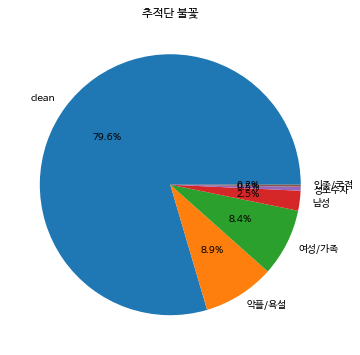

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.title('추적단 불꽃')
plt.pie(new_df['result'].value_counts()/len(new_df),
        labels = new_df['result'].unique(),
        autopct = '%.1f%%')
plt.show()

In [ ]:
label =  ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean']
new_df = pd.DataFrame(score, columns=label)

# df에 text열 추가 - 텍스트와 같이 보고 싶을 경우
new_df.insert(0, 'text', fire['Text']) # 앞에 숫자가 순서(왼쪽->오른쪽)

new_df[new_df['여성/가족'] >= 0.6]

,text,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
68,이대녀와 페미니스트들은 피해호소인 사태를 겪고 더 이상 집토끼가 아니다 존중하고 포...,0.73,0.02,0.02,0.03,0.01,0.01,0.01,0.04,0.07,0.34
71,이재명이추적단불꽃의 박지현과 손잡았다대선 마지막날 밤 피크타임에 젊은여성들 표를 얻...,0.75,0.01,0.01,0.05,0.01,0.01,0.02,0.03,0.16,0.09
205,추적단 불꽃 페미니즘 팔아먹는 장사치 아님?,0.67,0.01,0.01,0.02,0.01,0.01,0.02,0.03,0.17,0.17
209,얼마나 미치면 니넨 추적단 불꽃에게 페미니즘 팔아먹는 장사치라고 욕함?,0.80,0.02,0.01,0.02,0.01,0.01,0.02,0.04,0.19,0.06
271,엔번방 최초로 밝히신 추적단 불꽃 박지현님 이 추천하신 글! 민주당도 이재명도 싫던...,0.60,0.01,0.02,0.02,0.01,0.01,0.01,0.03,0.05,0.38
292,어차피 여자들은 윤석열 안뽑을거니까 소신투표하게 유도하라고 하는 펨코이걸보니 더욱 ...,0.77,0.05,0.02,0.01,0.01,0.02,0.01,0.02,0.08,0.20
293,뮤트합니다.. 이번 대선 여성들 투표 단합해서 여혐펨코유저 윤석열이 대통령 되는 거...,0.82,0.02,0.02,0.02,0.01,0.01,0.01,0.04,0.08,0.19
295,아직까지도 후보들 공약 찾아보기는 싫고 보돕보는 해야겠고 이재명 윤석열 똑같아보이고...,0.80,0.13,0.01,0.05,0.01,0.01,0.02,0.02,0.05,0.05
314,요즘 온갖 여혐펨코충들이 여시같은 여초사이트에서 심찍자고 여론조작 한다는데 오히려 ...,0.66,0.12,0.04,0.01,0.01,0.01,0.01,0.03,0.16,0.08
316,추적단 불꽃 박지현을 응원하고 지지합니다.박지현을 청와대로 보내려면 이재명을 청와대...,0.80,0.19,0.03,0.05,0.02,0.01,0.01,0.06,0.04,0.04


In [ ]:
fire_여성가족 = new_df[new_df['여성/가족'] >= 0.6]
fire_남성 = new_df[new_df['남성'] >= 0.6]
fire_성소수자 = new_df[new_df['성소수자'] >= 0.6]

In [ ]:
fire_여성가족.to_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/fire_여성가족.csv', encoding = 'utf-8')
fire_남성.to_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/fire_남성.csv', encoding = 'utf-8')
fire_성소수자.to_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/fire_성소수자.csv', encoding = 'utf-8')

### 안철수

In [ ]:
print(max(len(l) for l in park['Text'].astype(str)))
print(max(len(l) for l in fire['Text'].astype(str)))
print(max(len(l) for l in ahn['Text'].astype(str)))
print(max(len(l) for l in number['Text'].astype(str)))

263
177
596
247


In [ ]:
def CleanText(readData, Num=False, Eng=False):

    # Remove Retweets RT @user_screenname 
    text = re.sub('RT @[\w_]+: ', '', readData)
    text = re.sub('알티', '', text)

    # Remove Mentions
    text = re.sub('@[\w_]+', '', text)

    # Remove or Replace URL 
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ', text) # http로 시작되는 url
    text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ', text) # http로 시작되지 않는 url
    
    # Remove Hashtag
    text = re.sub('[#]+[0-9a-zA-Z_]+', ' ', text)

    # Remove Garbage Words (ex. &lt, &gt, etc)
    text = re.sub('[&]+[a-z]+', ' ', text)

    # Remove Special Characters
    text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)
    
    # Remove newline
    text = text.replace('\n',' ')
    
    if Num is True:
        # Remove Numbers
        text = re.sub(r'\d+',' ',text)
    
    if Eng is True:
        # Remove English 
        text = re.sub('[a-zA-Z]' , ' ', text)

    # Remove multi spacing & Reform sentence
    text = ' '.join(text.split())
       
    return text

In [ ]:
len(ahn)

56781

In [ ]:
ahn['Text'] = ahn['Text'].apply(lambda x: CleanText(str(x)))

In [ ]:
ahn = ahn.dropna()

In [ ]:
ahn

,Unnamed: 0,Datetime,Tweet Id,Text
0,0,2022-03-09 23:59:36+00:00,1.501709e+18,심상정 탓이니 안철수 덕이니 이러지 말고 결선투표제 꼭 관철하자 그래야 소신투표가 ...
1,1,2022-03-09 23:59:13+00:00,1.501709e+18,이분말 맞는듯요 안철수때문에 국힘 분란이 오면 이재명 다시 살아남요 하루빨리 대장동...
2,2,2022-03-09 23:58:57+00:00,1.501709e+18,안철수가 만들어준 대통령
3,3,2022-03-09 23:58:46+00:00,1.501709e+18,안철수 시팔새끼
4,4,2022-03-09 23:58:24+00:00,1.501709e+18,안철수 씹새꺄
...,...,...,...,...
56819,12269,2022-02-10 00:08:08+00:00,1.491565e+18,안주감 안철수 놓고하이에나 석열이 준석이서로 먹을라고 칼 싸움 볼 만 하쥬
56820,12270,2022-02-10 00:08:03+00:00,1.491565e+18,안철수 공식선거운동 준비 포털 유세차 계약도 완료
56821,12271,2022-02-10 00:05:02+00:00,1.491564e+18,어제 트헨드에서 안철수가 치고 올라 가든데 좀만 디나면 윤씨를 제낄것 같은 기세던데...
56822,12272,2022-02-10 00:03:57+00:00,1.491564e+18,응원합니다


In [ ]:

result = []
for t in ahn['Text'].astype(str):
    result.extend(pipe(t))

# dict -> list로 정리
score = [[item['score'] for item in i] for i in result]
#score # 확인용
score = np.round(score,2)

label =  ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean']
new_df = pd.DataFrame(score, columns=label)
new_df['result'] = new_df.idxmax(axis = 1)
new_df

,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,result
0,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.15,0.79,clean
1,0.01,0.01,0.01,0.02,0.00,0.02,0.02,0.01,0.19,0.72,clean
2,0.02,0.01,0.02,0.02,0.01,0.02,0.01,0.01,0.05,0.91,clean
3,0.01,0.01,0.01,0.05,0.01,0.03,0.03,0.04,0.83,0.03,악플/욕설
4,0.01,0.01,0.01,0.05,0.01,0.03,0.02,0.04,0.81,0.04,악플/욕설
...,...,...,...,...,...,...,...,...,...,...,...
56776,0.01,0.01,0.01,0.03,0.00,0.02,0.01,0.02,0.45,0.37,악플/욕설
56777,0.02,0.01,0.01,0.02,0.01,0.02,0.01,0.01,0.06,0.92,clean
56778,0.01,0.01,0.01,0.02,0.01,0.02,0.01,0.01,0.10,0.87,clean
56779,0.02,0.01,0.02,0.02,0.01,0.02,0.01,0.01,0.06,0.92,clean


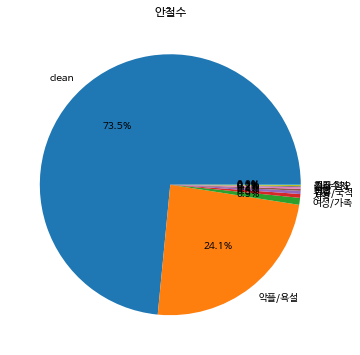

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.title('안철수')
plt.pie(new_df['result'].value_counts()/len(new_df),
        labels = new_df['result'].unique(),
        autopct = '%.1f%%')
plt.show()

In [ ]:
label =  ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean']
new_df = pd.DataFrame(score, columns=label)

# df에 text열 추가 - 텍스트와 같이 보고 싶을 경우
new_df.insert(0, 'text', ahn['Text']) # 앞에 숫자가 순서(왼쪽->오른쪽)

new_df[new_df['여성/가족'] >= 0.6]

,text,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
13,이재명은 윤석열 안철수 심상정과 싸웠다 잘했다 극좌와 극우는 통한다고 굿짐당과 정의...,0.91,0.01,0.02,0.04,0.02,0.03,0.02,0.10,0.05,0.10
19,허경영냅두고 왜 심상정팸 안철수냅두고 왜 심상정팸 맨날 여권여권거리는 친구들 결국 ...,0.76,0.02,0.01,0.04,0.02,0.02,0.01,0.08,0.22,0.06
133,씻는데 계속 한숨나옴 지금도 나옴 대체 공약도 없고 아는것도 없어서 안철수가 고개저...,0.70,0.01,0.01,0.03,0.01,0.01,0.01,0.04,0.18,0.14
379,윤석열 제20대 대통령 당선으로 바뀔 것들 여가부 폐지 안철수 총리 미지수 확실한 ...,0.79,0.01,0.02,0.05,0.01,0.02,0.01,0.07,0.06,0.18
513,트렌드 윤석열 대통령 취임일과 지방선거 안철수 인수위에서 여가부폐지 나올까,0.82,0.01,0.02,0.04,0.01,0.02,0.01,0.04,0.05,0.21
...,...,...,...,...,...,...,...,...,...,...,...
54798,안철수 카메라 각도 좀 이상한거 아님 혼 드워프 같아 보여,0.74,0.01,0.01,0.03,0.01,0.02,0.01,0.04,0.13,0.16
54959,오늘 토론은 심상정은 국힘당 2중대 안철수는 민주당 2중대 ㅋㅋㅋㅋ,0.80,0.02,0.01,0.04,0.01,0.02,0.01,0.03,0.14,0.18
54969,아 ㅋㅋㅋㅋㅋ 금속노조사무처장 출신 심상정씨 스타트업 안대표 안철수한테 강성노조의 ...,0.88,0.02,0.01,0.03,0.01,0.02,0.01,0.03,0.15,0.09
55673,대통령 후보 호감도 안철수 37 윤석열 34 이재명 34 심상정 30,0.78,0.02,0.03,0.02,0.01,0.01,0.01,0.04,0.15,0.14


In [ ]:
ahn_여성가족 = new_df[new_df['여성/가족'] >= 0.6]
ahn_남성 = new_df[new_df['남성'] >= 0.6]
ahn_성소수자 = new_df[new_df['성소수자'] >= 0.6]

In [ ]:
ahn_여성가족.to_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/ahn_여성가족.csv', encoding = 'utf-8')
ahn_남성.to_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/ahn_남성.csv', encoding = 'utf-8')
ahn_성소수자.to_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/ahn_성소수자.csv', encoding = 'utf-8')

In [ ]:
ahn_종교 = new_df[new_df['종교'] >= 0.6]
ahn_지역 = new_df[new_df['지역'] >= 0.6]

In [ ]:
ahn_종교.to_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/ahn_종교.csv', encoding = 'utf-8')
ahn_지역.to_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/ahn_지역.csv', encoding = 'utf-8')

### 4번

In [ ]:
number['Text'] = number['Text'].apply(lambda x: clean_tweets(str(x)))

result = []
for t in number['Text'].astype(str):
    result.extend(pipe(t))

# dict -> list로 정리
score = [[item['score'] for item in i] for i in result]
#score # 확인용
score = np.round(score,2)

label =  ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean']
new_df = pd.DataFrame(score, columns=label)
new_df['result'] = new_df.idxmax(axis = 1)
new_df

,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,result
0,0.01,0.02,0.02,0.03,0.01,0.02,0.01,0.01,0.05,0.90,clean
1,0.01,0.01,0.03,0.03,0.00,0.01,0.01,0.02,0.49,0.25,악플/욕설
2,0.01,0.01,0.02,0.04,0.01,0.63,0.01,0.02,0.03,0.41,지역
3,0.01,0.01,0.03,0.03,0.00,0.01,0.01,0.02,0.49,0.25,악플/욕설
4,0.02,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.11,0.85,clean
5,0.01,0.01,0.03,0.03,0.00,0.01,0.01,0.02,0.49,0.25,악플/욕설
6,0.01,0.01,0.02,0.04,0.01,0.63,0.01,0.02,0.03,0.41,지역
7,0.01,0.01,0.03,0.03,0.00,0.01,0.01,0.02,0.49,0.25,악플/욕설
8,0.01,0.01,0.03,0.03,0.00,0.01,0.01,0.02,0.49,0.25,악플/욕설
9,0.02,0.01,0.02,0.02,0.01,0.02,0.01,0.01,0.05,0.91,clean


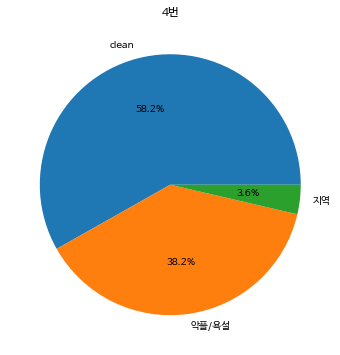

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.title('4번')
plt.pie(new_df['result'].value_counts()/len(new_df),
        labels = new_df['result'].unique(),
        autopct = '%.1f%%')
plt.show()

In [ ]:
label =  ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean']
new_df = pd.DataFrame(score, columns=label)

# df에 text열 추가 - 텍스트와 같이 보고 싶을 경우
new_df.insert(0, 'text', number['Text']) # 앞에 숫자가 순서(왼쪽->오른쪽)

new_df[new_df['악플/욕설'] >= 0.4]

,text,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
1,1번 G-G#-A-A#-B-C-C#-D-D#-E-F-F#-G 2번 D-D#-E-F-...,0.01,0.01,0.03,0.03,0.0,0.01,0.01,0.02,0.49,0.25
3,1번 G-G#-A-A#-B-C-C#-D-D#-E-F-F#-G 2번 D-D#-E-F-...,0.01,0.01,0.03,0.03,0.0,0.01,0.01,0.02,0.49,0.25
5,1번 G-G#-A-A#-B-C-C#-D-D#-E-F-F#-G 2번 D-D#-E-F-...,0.01,0.01,0.03,0.03,0.0,0.01,0.01,0.02,0.49,0.25
7,1번 G-G#-A-A#-B-C-C#-D-D#-E-F-F#-G 2번 D-D#-E-F-...,0.01,0.01,0.03,0.03,0.0,0.01,0.01,0.02,0.49,0.25
8,1번 G-G#-A-A#-B-C-C#-D-D#-E-F-F#-G 2번 D-D#-E-F-...,0.01,0.01,0.03,0.03,0.0,0.01,0.01,0.02,0.49,0.25
10,1번 G-G#-A-A#-B-C-C#-D-D#-E-F-F#-G 2번 D-D#-E-F-...,0.01,0.01,0.03,0.03,0.0,0.01,0.01,0.02,0.49,0.25
12,1번 G-G#-A-A#-B-C-C#-D-D#-E-F-F#-G 2번 D-D#-E-F-...,0.01,0.01,0.03,0.03,0.0,0.01,0.01,0.02,0.49,0.25
14,1번 G-G#-A-A#-B-C-C#-D-D#-E-F-F#-G 2번 D-D#-E-F-...,0.01,0.01,0.03,0.03,0.0,0.01,0.01,0.02,0.49,0.25
15,1번 G-G#-A-A#-B-C-C#-D-D#-E-F-F#-G 2번 D-D#-E-F-...,0.01,0.01,0.03,0.03,0.0,0.01,0.01,0.02,0.49,0.25
16,1번 G-G#-A-A#-B-C-C#-D-D#-E-F-F#-G 2번 D-D#-E-F-...,0.01,0.01,0.03,0.03,0.0,0.01,0.01,0.02,0.49,0.25


In [ ]:
number_여성가족 = new_df[new_df['여성/가족'] >= 0.6]
number_남성 = new_df[new_df['남성'] >= 0.6]
number_성소수자 = new_df[new_df['성소수자'] >= 0.6]

In [ ]:
number_여성가족.to_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/number_여성가족.csv', encoding = 'utf-8')
number_남성.to_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/number_남성.csv', encoding = 'utf-8')
number_성소수자.to_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/number_성소수자.csv', encoding = 'utf-8')